# Exercise 1 - TDT 4265 Computer Vision and Deep Learning
Run this to get necessarily python files

In [1]:
for module in ('MyNetwork', 'expand_mnist.py', 'mnist.pkl.gz', 'mnist_average_darkness.py', 
               'mnist_loader.py', 'mnist_svm.py', 'network.py', 'test.py'):
  print(module)
  !rm {module}
  url = 'https://raw.githubusercontent.com/hfalk/TDT4265/master/Exercise%201/{}'.format(module) 
  !wget {url} 
!rm -r __pycache__
!ls

MyNetwork
rm: cannot remove 'MyNetwork': No such file or directory
--2018-02-28 14:40:16--  https://raw.githubusercontent.com/hfalk/TDT4265/master/Exercise%201/MyNetwork
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492526 (481K) [text/plain]
Saving to: ‘MyNetwork’

MyNetwork           100%[===================>] 480.98K  --.-KB/s    in 0.04s   

2018-02-28 14:40:17 (10.5 MB/s) - ‘MyNetwork’ saved [492526/492526]

expand_mnist.py
rm: cannot remove 'expand_mnist.py': No such file or directory
--2018-02-28 14:40:17--  https://raw.githubusercontent.com/hfalk/TDT4265/master/Exercise%201/expand_mnist.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.gi

datalab		 mnist_average_darkness.py  mnist.pkl.gz  MyNetwork   test.py
expand_mnist.py  mnist_loader.py	    mnist_svm.py  network.py


## Part 1
The simplest form of a neural net is the perceptron, a binary classifier that maps an input to a binary output using a series of weights and biases. 
![Perceptron illustration](http://ataspinar.com/wp-content/uploads/2016/11/perceptron_schematic_overview.png "Perceptron")

The perceptron function can be stated as $f(x) = \begin{cases} 1\text{ if }w^Tx + b > 0 \\ -1 \text{ otherwise} \end{cases}$. 

We can write this as a single multiplication by augmenting the weight and input vectors:
$f(x) = \begin{cases} 1\text{  if }a^Ty > 0 \\ -1 \text{ otherwise} \end{cases}$ 

where a is the augmented weight vector combining the weights and biases, $a = [b, w]^T$, and y is the augmented input vector $y = [1, x]^T$

For more information and a description of the learning algorithm see https://en.wikipedia.org/wiki/Perceptron


### Task 1
Implement the perceptron algorithm. The skeleton code below can be modified freely and merely offers a starting suggestion. You can asssume all datapoints will be 2 dimensional.

In [0]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, labels):
        self.input_size = input_size
        self.weights = np.zeros((input_size+1,3))
        self.labels = labels
        self.result = np.zeros(input_size)
        
    def classify(self, data, element):
      temp = 0
      for i,j in zip(self.weights[element], data[element]):
        temp += i*j
      self.result[element] = np.sign(temp)  
        
    def train_perceptron(self, data):
      for x in range(self.input_size):
        self.classify(data, x)
        self.weights[x+1] = self.weights[x] + (self.labels[x] - self.result[x])*data[x]

### Task 2
The code provided below generates a 2D linearly separable dataset. Use this to train a perceptron classifier and plot the data along with the separating hyperplane. We suggest using pyplot from the matplotlib library for plotting.

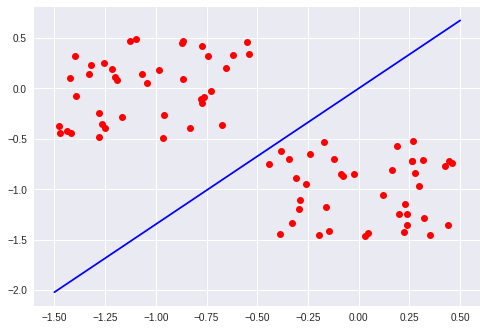

In [7]:
from pylab import rand
import numpy as np
import matplotlib.pyplot as plt

def generateData(n):
    """
    generates a 2D linearly separable dataset with n samples for each class.
    Example usage:
    trainingData = generateData(40)
    x = trainingData[0] returns all the datapoints
    y = trainingData[1] returns the corresponding labels
    """
    xb = (rand(n)*2-1)/2-1
    yb = (rand(n)*2-1)/2+0
    xr = (rand(n)*2-1)/2+0
    yr = (rand(n)*2-1)/2-1
    inputs = []
    labels = []
    for i in range(len(xb)):
        inputs.append([xb[i],yb[i],-1.0])
        labels.append(1)
        inputs.append([xr[i],yr[i],-1.0])
        labels.append(-1)
    return [np.array(inputs), np.array(labels)]

dataSize = 40
trainingData = generateData(dataSize)
x = trainingData[0] #returns all the datapoints
y = trainingData[1] #returns the corresponding labels

#train perceptron
neuron = Perceptron(dataSize*2, y)
neuron.train_perceptron(x)

#calculate hyperplane
growth = -neuron.weights[dataSize-1,1]/neuron.weights[dataSize-1,0]
hyperplane = np.zeros((10000, 2))
for i in range(10000):
  hyperplane[i,0] = ((i/5000) - 1.5)
  hyperplane[i,1] = growth*((i/5000) - 1.5)

#plot graphs
plt.plot(x[:,0],x[:,1], 'ro')
plt.plot(hyperplane[:,0], hyperplane[:,1], 'b-')
plt.show()




### Task 3
1. Can you find any issues with the way the perceptron algorithm finds a solution? Assume the dataset is linearly separable
    
2. When the dataset is linearly separable the perceptron algorithm will converge to a solution given enough iterations. However for non-separable data learning can fail completely and the algorithm might never converge. How would you modify the algorithm to ensure at least an approximate solution is found?


## Part 2

### Task 1
In this exercise you are going to get familiar with the basics of feedforward neural networks. Look at the code provided below and run it to figure out the accuracy of the network. Start by running the network for 2 epochs. When you are done, increase the number of epochs to 10, and finally run the network for 20 epochs. What are your findings? Compare the results.

In [9]:
import mnist_loader
import network
import numpy as np

def sigmoid(z):
  """The sigmoid function."""
  return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
  """Derivative of the sigmoid function."""
  return sigmoid(z)*(1-sigmoid(z))

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
validation_data = list(validation_data)

net = network.Network([784, 10, 10])
net.SGD(training_data, 20, 10, 3.0, sigmoid, sigmoid_prime, test_data=test_data)

Epoch 0 : 8709 / 10000
Epoch 1 : 8866 / 10000
Epoch 2 : 8990 / 10000
Epoch 3 : 9089 / 10000
Epoch 4 : 9065 / 10000
Epoch 5 : 9113 / 10000
Epoch 6 : 9079 / 10000
Epoch 7 : 9077 / 10000
Epoch 8 : 9127 / 10000
Epoch 9 : 9203 / 10000
Epoch 10 : 9171 / 10000
Epoch 11 : 9073 / 10000
Epoch 12 : 9135 / 10000
Epoch 13 : 9079 / 10000
Epoch 14 : 9184 / 10000
Epoch 15 : 9069 / 10000
Epoch 16 : 9133 / 10000
Epoch 17 : 9134 / 10000
Epoch 18 : 9152 / 10000
Epoch 19 : 9157 / 10000


### Task 2

Modify the network to understand how its architecture affect its performance. Start by reducing the number of neurons in the hidden layer to 2, then make it 20. How does it affect the accuracy of the network? Train the network for 2, 10 and 20 epochs. When you are done with this, experiment with adding more hidden layers to the network. What happens?

In [13]:
import mnist_loader
import network

def sigmoid(z):
  """The sigmoid function."""
  return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
  """Derivative of the sigmoid function."""
  return sigmoid(z)*(1-sigmoid(z))

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
validation_data = list(validation_data)

net = network.Network([784, 20, 20, 10])
net.SGD(training_data, 10, 10, 3.0, sigmoid, sigmoid_prime, test_data=test_data)

Epoch 0 : 8905 / 10000
Epoch 1 : 9142 / 10000
Epoch 2 : 9237 / 10000
Epoch 3 : 9237 / 10000
Epoch 4 : 9300 / 10000
Epoch 5 : 9328 / 10000
Epoch 6 : 9294 / 10000
Epoch 7 : 9322 / 10000
Epoch 8 : 9363 / 10000
Epoch 9 : 9366 / 10000


# Answers
Add your answers here.

## Part 1

#### Task 1

#### Task 2

#### Task 3

1. The answer is either 1 or -1, no inbetween. A small change in weights can completely flip the perceptron. This becomes a problem when there is more than two containers to classify the input into. You want a small change to result in a small change in the output, but since it completely flips it might completely flip everything else, and give a big change. Also, It does not find an optimal solution, only a solution.

2. Use some way of making the learning set separable, or using multi-layer networks. 


## Part 2

#### Task 1

**For 2 batches: **

Epoch 0 : 8818 / 10000

Epoch 1 : 9001 / 10000


**For 10 batches: **

Epoch 0 : 8647 / 10000

Epoch 1 : 8932 / 10000

Epoch 2 : 8978 / 10000

Epoch 3 : 9047 / 10000

Epoch 4 : 9048 / 10000

Epoch 5 : 9112 / 10000

Epoch 6 : 9088 / 10000

Epoch 7 : 9139 / 10000

Epoch 8 : 9053 / 10000

Epoch 9 : 9136 / 10000


**For 20 batches**

Epoch 0 : 8709 / 10000

Epoch 1 : 8866 / 10000

Epoch 2 : 8990 / 10000

Epoch 3 : 9089 / 10000

Epoch 4 : 9065 / 10000

Epoch 5 : 9113 / 10000

Epoch 6 : 9079 / 10000

Epoch 7 : 9077 / 10000

Epoch 8 : 9127 / 10000

Epoch 9 : 9203 / 10000

Epoch 10 : 9171 / 10000

Epoch 11 : 9073 / 10000

Epoch 12 : 9135 / 10000

Epoch 13 : 9079 / 10000

Epoch 14 : 9184 / 10000

Epoch 15 : 9069 / 10000

Epoch 16 : 9133 / 10000

Epoch 17 : 9134 / 10000

Epoch 18 : 9152 / 10000

Epoch 19 : 9157 / 10000

The network reaches a plateu after about 5 epoches. After that it swings up and down, the training makes it better and worse depending on the training input. It is not able to reach more than about 92 % accuracy. 

#### Task 2

**2 neurons in the hidden layer:**

Epoch 9 : 3598 / 10000

This results in very bad accuracy, since there isn't enough neurons to succesfully classify into 9 different categories

**20 neurons in the hidden layer**

Epoch 9 : 9329 / 10000

This results in much better accuracy, also better than the 10-neuron solution. This also results in much longer run-time, since there is ten times as many weights to update compared to the 2 neuron-solution.
